In [1]:
from neuralogic.nn import get_evaluator
from neuralogic.core import R, Template, V, C, Settings, Transformation, Combination, Aggregation
from neuralogic.core.constructs.function.tree import FunctionContainer
from neuralogic.core.settings import Settings
from neuralogic.dataset import Dataset
from neuralogic.optim import SGD

F = FunctionContainer()
train_dataset = Dataset()
template = Template()

train_dataset.add_example([R.b[3], R.c[5], R.d[6], R.e[0]])
train_dataset.add_queries([R.a[14]])

C:\Users\kraus\Plocha\BAK\PyNeuraLogicFork\neuralogic\core\builder\builder.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


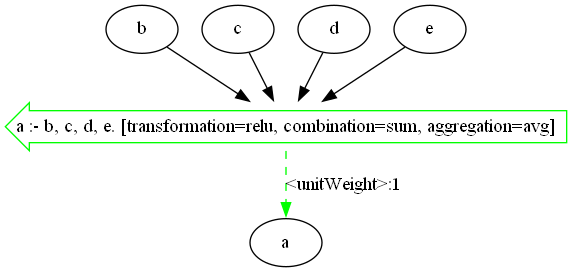

In [2]:
#template += (R.a <= (R.b, R.c, R.d, R.e)) | [Combination.SUM, Transformation.RELU, Aggregation.AVG]
template += (R.a <= (x:=R.b, y:= R.c, z:= R.d, q:= R.e)) >> F.avg[F.relu(x + y + z + q)]

# expression above has following eval order:
# R.a    ||   x:= R.b    ||     y:= R.c    ||     R.a <= ()   ||    x + y   ||    F.identity  ||    >>   ||   template +=

template.draw()

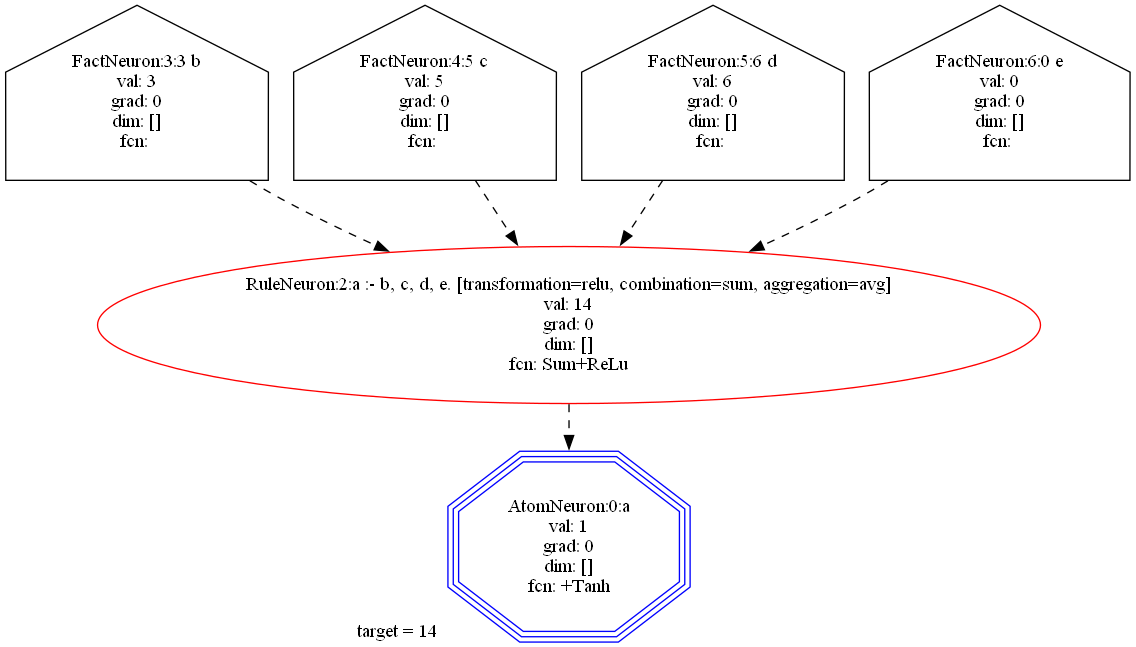

In [3]:
settings = Settings(optimizer=SGD(), epochs=1)
neuralogic_evaluator = get_evaluator(template, settings)
build_dataset = neuralogic_evaluator.build_dataset(train_dataset)

for _ in neuralogic_evaluator.train(train_dataset):
    pass

build_dataset[0].draw()